# Introduction
Assignment: Using this dataset of article open-access prices paid by the WELLCOME Trust between 2012 and 2013, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal. For a real bonus round, identify the open access prices paid by subject area.
### Outline
1. Cleaning
<br>A. Missing Data
<br>B. Cleaning Algorithms
2. Calculations
<br>A. 5 Most Common Journals + Total Articles of Each
<br>B. Mean, Median and Standard Deviation of the Open-Access Cost per Article for Each Journal
<br>C. BONUS: Identify the Open-Access Prices Paid by Subject Area

# 1. Cleaning
### A. Missing Data
Let's see what we're dealing with here...

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
file_path = "data/WELLCOME_APCspend2013_forThinkful.csv"
df = pd.DataFrame()
df = pd.read_csv(file_path,  encoding = "ISO-8859-1")
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


Nothing out of the ordinary so far, other than the encoding. From a quick Stack Overflow search of the error type, I tried (and succeeded) in loading the data with the above encoding.
<br>The columns look well organized other than PMID/PMCID which has a NaN in the very first row.
<br>Let's see if there are any more NaNs.

In [3]:
df.isnull().sum()

PMID/PMCID                                             199
Publisher                                                0
Journal title                                            1
Article title                                            0
COST (£) charged to Wellcome (inc VAT when charged)      0
dtype: int64

Looks like we may be able to get our first question out of the way with a good 'ol value_counts on the 'Journal title' column

In [4]:
journal_counts = df['Journal title'].value_counts()
journal_counts.head()

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
Name: Journal title, dtype: int64

Wow. Right off the bat, the top 2 journals are identical other than some capitalization. No doubt they are the same journal, so lets apply a capitalization function to the Series.

In [5]:
df_clean = df
df_clean['Journal title'] = df['Journal title'].apply(lambda x: str(x).lower());
journal_counts = df_clean['Journal title'].value_counts()
journal_counts.head()

plos one                           190
journal of biological chemistry     53
neuroimage                          29
plos pathogens                      24
plos genetics                       24
Name: Journal title, dtype: int64

In [6]:
df_clean['Journal title'] = df['Journal title'].apply(lambda x: x.replace(" ", ""))
journal_counts = df_clean['Journal title'].value_counts()
journal_counts.head()

plosone                         200
journalofbiologicalchemistry     53
neuroimage                       29
nucleicacidsresearch             25
plospathogens                    24
Name: Journal title, dtype: int64

The 5 most common articles are listed above with the number of articles in each to the right of the journal name.

To find the Mean, Median and Standard Deviation per Article for each journal we group by the journal and perform the statistical operation.

In [7]:
# convert Cost to a numeric by filtering out the pound sign.
new_cols = df_clean.columns.values
new_cols[-1] = 'Cost'
df_clean.columns = new_cols
df_clean['Cost'] = df_clean['Cost'].apply(lambda x: x.replace('£', ''))
df_clean['Cost'] = df_clean['Cost'].apply(lambda x: x.replace('$', ''))
df_clean['Cost'] = df_clean['Cost'].astype(np.float64)

# perform statistical operation
means = df_clean.groupby(['Journal title']).mean()
medians = df_clean.groupby(['Journal title']).median()
stds = df_clean[['Journal title', 'Cost']].groupby(['Journal title']).apply(lambda x: np.std(x))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


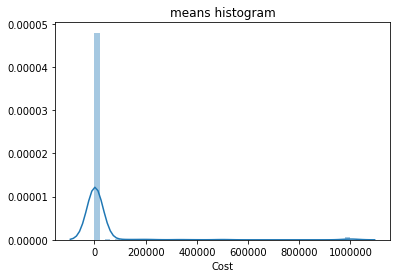

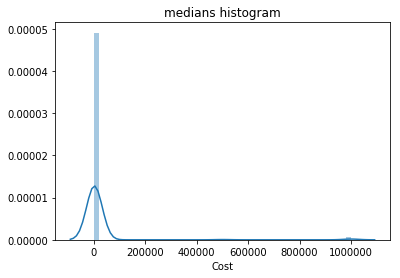

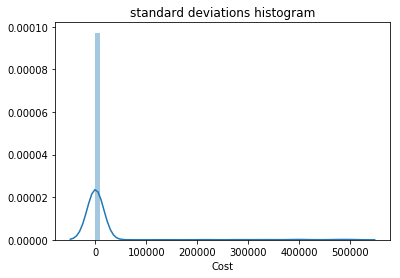

In [8]:
# means
sns.distplot(means['Cost'])
plt.title('means histogram')
plt.show()

# medians
sns.distplot(medians['Cost'])
plt.title('medians histogram')
plt.show()

# stds
sns.distplot(stds['Cost'])
plt.title('standard deviations histogram')
plt.show()

Looks like I have to deal with the extrememly large outliers here. I'll Winsorize them!

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


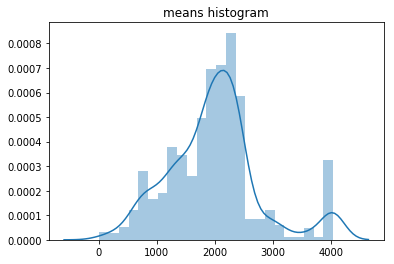

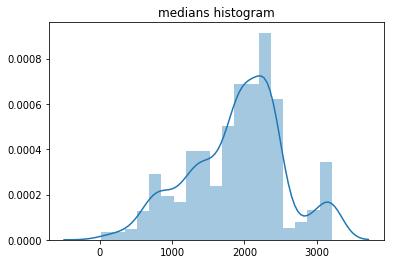

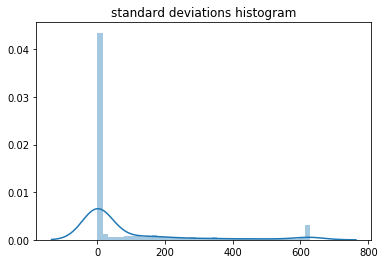

In [15]:
win_means = st.mstats.winsorize(means['Cost'], limits=[None, 0.05])
win_medians = st.mstats.winsorize(medians['Cost'], limits=[None, 0.05])
win_stds = st.mstats.winsorize(stds['Cost'], limits=[None, 0.05])

# means
sns.distplot(win_means)
plt.title('means histogram')
plt.show()

# medians
sns.distplot(win_medians)
plt.title('medians histogram')
plt.show()


# stds
sns.distplot(win_stds)
plt.title('standard deviations histogram')
plt.show()